[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_2_AnalisisEstadistico/notebook/exercises/Practica_Scrap_EDAWoAns.ipynb)

![img](https://ddfoqzqsu0zvp.cloudfront.net/media/documents/Tecnologico_de_Monterrey_LockUp_horizontal_RGB.png)

# Equipo 1
- Kevin Torres Martínez - A01656257
- Sebastián Rodríguez Galarza - A01656159
- Aldo Fernando Ortiz Mejía - A01654725
- Gerardo Arturo Miranda Godoy - A01338074

<h1><center>Práctica de Módulo 2</center><h1>

## ¿Qué es web scrapping?

Es una técnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes técnicas como Scrappy, BeautifulSoup, etc. La librería más común es BeautifulSoup. 

Extrae la página Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el análisis y la exploración de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes propósitos. En nuestra demostración adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea árboles de análisis que son útiles para extraer los datos fácilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulación y el análisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualización de datos

------
### ¿Cómo funciona el Web Scraping?

Cuando ejecuta el código para web scraping, se envía una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor envía los datos y le permite leer la página HTML o XML. Luego, el código analiza la página HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos básicos:

   * Busque la URL que desea raspar
   * Inspecciona la página
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el código y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cuál debería ser el precio óptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar cómo podemos obtener información relacionada con un producto en particular (computadora portátil).

Primero, importemos todas las bibliotecas necesarias:

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Los datos que extraemos son datos no estructurados. Por eso, crearemos listas vacías para almacenarlas de forma estructurada

In [2]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificación de las computadoras portátiles. La URL de esta página es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)

In [3]:
url='https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.'

In [4]:
req = requests.get(url)

In [5]:
response = req.content

In [6]:
response

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.7570a9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png"/><link rel="apple

### Paso 2: inspección de la página

Los datos suelen estar anidados en etiquetas. Entonces, inspeccionamos la página para ver, bajo qué etiqueta están anidados los datos que queremos raspar. Para inspeccionar la página, simplemente haga clic derecho en el elemento y haga clic en "Inspeccionar" (o F12).

![img](https://miro.medium.com/max/571/0*TF2VBxPanqhxb-hY.png)

### Paso 3: busque los datos que desea extraer

Extraigamos el nombre, precio y calificación que están anidados en la etiqueta "div" respectivamente.

Por lo general, nos confundiremos sobre qué etiqueta necesitamos copiar para esta computadora portátil. Podemos usar https://webformatter.com/ para filtrar la etiqueta por el nombre, el precio y la calificación, y podemos copiar fácilmente con esta herramienta.

Ahora que hemos escrito el código para abrir la URL, es hora de extraer los datos del sitio web. Como se mencionó anteriormente, los datos que queremos extraer están anidados en etiquetas <div>. Entonces, encontraremos las etiquetas div con esos respectivos nombres de clase, extraeremos y almacenaremos los datos en una variable. Consulte el código a continuación:

In [7]:
soup = BeautifulSoup(response, "html.parser")

In [8]:
main_box = soup.find_all("div", {"class":"_13oc-S"})

In [9]:
len(main_box)

24

In [10]:
box=main_box[0]

In [11]:
box

<div class="_13oc-S"><div data-id="COMFTC4YBSK8WZQC" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/dell-xps-core-i5-10th-gen-8-gb-512-gb-ssd-windows-10-home-9300-thin-light-laptop/p/itm7de8623c77dff?pid=COMFTC4YBSK8WZQC&amp;lid=LSTCOMFTC4YBSK8WZQCYL4O3P&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_L72hIogl46ju4jUth0wP%2Bg%2BTdSeSpM9eiS6Ol1R7pWoJM9RO5aFosHElGU7DvZIRCqm2arMdVhYnMMXr4AQI%2Fg%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=5ctnqmt1o00000001631063500584&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="DELL XPS Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home) XPS 9300 Thin and Light Laptop" class="_396cs4 _3exPp9" src="https://rukminim1.flixcart.com/image/312/312/kf2v3ww0/computer/h/t/m/dell-origin

In [12]:
# Safe find in box when rating does not exist
def safe_find_rating(box, class_name):
    box_nullable = box.find('div', {'class': class_name})
    
    return box_nullable.text.strip() if (box_nullable is not None) else '0.0'

In [13]:
title = box.find('div', {'class':'_4rR01T'}).text.strip()
price = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.strip()
rating = safe_find_rating(box, '_3LWZlK')

In [14]:
print(title,price,rating)

DELL XPS Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home) XPS 9300 Thin and Light Laptop ₹1,19,990 0.0


In [15]:
data_list=[]
for box in main_box:
    temp_dict={}
    temp_dict["title"] = box.find('div', {'class':'_4rR01T'}).text.strip()
    temp_dict["rating"] = safe_find_rating(box, '_3LWZlK')
    temp_dict["price"] = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.strip()[1:]
    
    data_list.append(temp_dict)

### Paso 4: Crear un dataframe y guardar los datos en csv

Después de extraer los datos, es posible que desee almacenarlos en un formato. Este formato varía según sus necesidades. Para este ejemplo, almacenaremos los datos extraídos en formato CSV (valores separados por comas). Para hacer esto, agregaré las siguientes líneas a mi código:

In [16]:
laptop_df = pd.DataFrame(data_list)

In [17]:
laptop_df

,title,rating,price
0,DELL XPS Core i5 10th Gen - (8 GB/512 GB SSD/W...,0.0,"1,19,990"
1,ASUS VivoBook 15 Core i3 10th Gen - (4 GB/1 TB...,3.8,"34,990"
2,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,"45,990"
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,4.4,"40,990"
4,Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...,3.9,"29,990"
5,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,4.3,"39,490"
6,DELL Inspiron Core i3 11th Gen - (4 GB/256 GB ...,4.1,"37,590"
7,ALIENWARE Core i9 10th Gen - (32 GB/1 TB SSD/W...,4.6,"3,19,990"
8,DELL Vostro Core i3 10th Gen - (8 GB/256 GB SS...,4.2,"38,777"
9,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,"56,990"


In [18]:
laptop_df.to_csv("datos_compus.csv", index=False, encoding='utf-8')

### Paso 5: Un poco de EDA y visualización de este archivo

In [19]:
laptop_df = pd.read_csv("./datos_compus.csv", sep=None, thousands=',', engine='python')

In [20]:
laptop_df

,title,rating,price
0,DELL XPS Core i5 10th Gen - (8 GB/512 GB SSD/W...,0.0,119990
1,ASUS VivoBook 15 Core i3 10th Gen - (4 GB/1 TB...,3.8,34990
2,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,45990
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,4.4,40990
4,Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...,3.9,29990
5,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,4.3,39490
6,DELL Inspiron Core i3 11th Gen - (4 GB/256 GB ...,4.1,37590
7,ALIENWARE Core i9 10th Gen - (32 GB/1 TB SSD/W...,4.6,319990
8,DELL Vostro Core i3 10th Gen - (8 GB/256 GB SS...,4.2,38777
9,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,56990


In [21]:
laptop_df.shape

(24, 3)

In [22]:
laptop_df.dtypes

title      object
rating    float64
price       int64
dtype: object

Quiero dividir el título debido a todas las especificaciones y nombres de portátiles en una fila.

Lo dividiremos en diferentes columnas por separado usando la opción split ()

In [23]:
laptop_df[['model', 'spec']] = laptop_df['title'].str.split('-', n=1, expand=True)
del laptop_df['title']
laptop_df.head()

,rating,price,model,spec
0,0.0,119990,DELL XPS Core i5 10th Gen,(8 GB/512 GB SSD/Windows 10 Home) XPS 9300 Th...
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,(4 GB/1 TB HDD/Windows 10 Home) X515JA-BR381T...
2,4.4,45990,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen,(8 GB/512 GB SSD/Windows 10 Home) 14ITL6 Thin...
3,4.4,40990,HP 14s Core i3 11th Gen,(8 GB/256 GB SSD/Windows 10 Home) 14s- DY2501...
4,3.9,29990,Lenovo Ideapad 3 Athlon Dual Core 3050U,(4 GB/1 TB HDD/Windows 10 Home) 15ADA05 Laptop


Usamos esta opción dividida (split "-") para separar del título y crear una columna separada como modelo y especificación y eliminar el título

In [24]:
laptop_df[['RAM', 'HDD']] = laptop_df['spec'].str.split('(', n=1, expand=True)
del laptop_df['spec']
laptop_df.head()

,rating,price,model,RAM,HDD
0,0.0,119990,DELL XPS Core i5 10th Gen,,8 GB/512 GB SSD/Windows 10 Home) XPS 9300 Thin...
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,,4 GB/1 TB HDD/Windows 10 Home) X515JA-BR381T T...
2,4.4,45990,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen,,8 GB/512 GB SSD/Windows 10 Home) 14ITL6 Thin a...
3,4.4,40990,HP 14s Core i3 11th Gen,,8 GB/256 GB SSD/Windows 10 Home) 14s- DY2501TU...
4,3.9,29990,Lenovo Ideapad 3 Athlon Dual Core 3050U,,4 GB/1 TB HDD/Windows 10 Home) 15ADA05 Laptop


In [25]:
laptop_df[['RAM', 'Hard disk']] = laptop_df['HDD'].str.split('/', n=1, expand=True)
del laptop_df['HDD']
laptop_df.head()

,rating,price,model,RAM,Hard disk
0,0.0,119990,DELL XPS Core i5 10th Gen,8 GB,512 GB SSD/Windows 10 Home) XPS 9300 Thin and ...
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,4 GB,1 TB HDD/Windows 10 Home) X515JA-BR381T Thin a...
2,4.4,45990,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen,8 GB,512 GB SSD/Windows 10 Home) 14ITL6 Thin and Li...
3,4.4,40990,HP 14s Core i3 11th Gen,8 GB,256 GB SSD/Windows 10 Home) 14s- DY2501TU Thin...
4,3.9,29990,Lenovo Ideapad 3 Athlon Dual Core 3050U,4 GB,1 TB HDD/Windows 10 Home) 15ADA05 Laptop


Continuemos hasta conseguir lo siguiente...

In [26]:
laptop_df[['Storage', 'OS']] = laptop_df['Hard disk'].str.split('/', n=1, expand=True)
del laptop_df['Hard disk']
laptop_df.head()

,rating,price,model,RAM,Storage,OS
0,0.0,119990,DELL XPS Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home) XPS 9300 Thin and Light Laptop
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,4 GB,1 TB HDD,Windows 10 Home) X515JA-BR381T Thin and Light ...
2,4.4,45990,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen,8 GB,512 GB SSD,Windows 10 Home) 14ITL6 Thin and Lig...
3,4.4,40990,HP 14s Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) 14s- DY2501TU Thin and Light ...
4,3.9,29990,Lenovo Ideapad 3 Athlon Dual Core 3050U,4 GB,1 TB HDD,Windows 10 Home) 15ADA05 Laptop


In [27]:
laptop_df[['System', 'Other_Info']] = laptop_df['OS'].str.split(')', n=1, expand=True)
del laptop_df['OS']
laptop_df.head()

,rating,price,model,RAM,Storage,System,Other_Info
0,0.0,119990,DELL XPS Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home,XPS 9300 Thin and Light Laptop
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,4 GB,1 TB HDD,Windows 10 Home,X515JA-BR381T Thin and Light Lapto...
2,4.4,45990,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen,8 GB,512 GB SSD,Windows 10 Home,14ITL6 Thin and Lig...
3,4.4,40990,HP 14s Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home,14s- DY2501TU Thin and Light Laptop
4,3.9,29990,Lenovo Ideapad 3 Athlon Dual Core 3050U,4 GB,1 TB HDD,Windows 10 Home,15ADA05 Laptop


### Paso 6: Identificación de valores perdidos

Los métodos isnull () y notnull () son las formas más comunes de identificar valores perdidos.

Mientras maneja los datos faltantes, primero debe identificar las filas y columnas que contienen los valores faltantes, contar el número de valores faltantes y luego decidir cómo desea tratarlos.

Es importante que trate los valores faltantes en cada columna por separado, en lugar de implementar una única solución (por ejemplo, reemplazar los NaN por la media de una columna) para todas las columnas.

isnull () devuelve un valor booleano (Verdadero / Falso) que luego se puede usar para encontrar las filas o columnas que contienen valores perdidos.

In [28]:
laptop_df.isna()

,rating,price,model,RAM,Storage,System,Other_Info
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True


### Identificación de valores perdidos en columnas

Primero calculemos el número total de valores faltantes en el marco de datos. Puede calcular el número de valores perdidos en cada columna mediante df.isnull().Sum()

In [29]:
laptop_df.isna().sum()

rating        0
price         0
model         0
RAM           0
Storage       0
System        0
Other_Info    5
dtype: int64

In [30]:
laptop_df = laptop_df.dropna(axis=0).reset_index(drop=True)

In [31]:
laptop_df

,rating,price,model,RAM,Storage,System,Other_Info
0,0.0,119990,DELL XPS Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home,XPS 9300 Thin and Light Laptop
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,4 GB,1 TB HDD,Windows 10 Home,X515JA-BR381T Thin and Light Lapto...
2,4.4,45990,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen,8 GB,512 GB SSD,Windows 10 Home,14ITL6 Thin and Lig...
3,4.4,40990,HP 14s Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home,14s- DY2501TU Thin and Light Laptop
4,3.9,29990,Lenovo Ideapad 3 Athlon Dual Core 3050U,4 GB,1 TB HDD,Windows 10 Home,15ADA05 Laptop
5,4.3,39490,Lenovo IdeaPad 3 Core i3 10th Gen,8 GB,1 TB HDD,Windows 10 Home,15IML05 Thin and Light Laptop
6,4.1,37590,DELL Inspiron Core i3 11th Gen,4 GB,256 GB SSD,Windows 10,Inspiron 3501 Laptop
7,4.2,38777,DELL Vostro Core i3 10th Gen,8 GB,256 GB SSD,Windows 10 Home,Vostro 3401 Thin and Light Laptop
8,4.1,39990,HP 15s Core i3 10th Gen,8 GB,1 TB HDD,Windows 10 Home,15s-DU1066TU Thin and Light Laptop
9,4.3,38990,ASUS Core i3 10th Gen,4 GB + 32 GB Optane,512 GB SSD,Windows 10 Home,X515JA-EJ372TS Thin and Light...


In [32]:
len(laptop_df)

19

In [33]:
laptop_df.groupby(['model']).size().reset_index(name='count').sort_values(by="count", ascending=False)

,model,count
8,DELL Vostro Core i3 10th Gen,2
5,DELL Inspiron Core i3 11th Gen,2
9,DELL XPS Core i5 10th Gen,1
15,Lenovo Ideapad 3 Athlon Dual Core 3050U,1
14,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen,1
13,Lenovo IdeaPad 3 Core i3 10th Gen,1
12,HP Pavilion Core i5 11th Gen,1
11,HP 15s Core i3 10th Gen,1
10,HP 14s Core i3 11th Gen,1
0,ASUS Core i3 10th Gen,1


In [34]:
laptop_df.describe()

,rating,price
count,19.000000,19.000000
mean,3.805263,49160.315789
std,1.357069,20744.757233
min,0.000000,29990.000000
25%,4.050000,38883.500000
50%,4.300000,39990.000000
75%,4.350000,50990.000000
max,4.700000,119990.000000


In [35]:
laptop_df.dtypes

rating        float64
price           int64
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

Ahora necesitamos filtrar las mejores computadoras portátiles con buenas especificaciones, precio y calificación de la lista

Muestra los siguientes resultados:
 * Laptops en rating <= 4
 * Laptops con rating >= 3.5 y un precio entre 30 y 40 mil $

In [36]:
laptop_df[laptop_df['rating'] <= 4].sort_values(by="rating", ascending=False)

,rating,price,model,RAM,Storage,System,Other_Info
10,4.0,37379,DELL Vostro Core i3 10th Gen,8 GB,1 TB HDD,Windows 10 Home,Vostro 3401 Thin and Light Laptop
4,3.9,29990,Lenovo Ideapad 3 Athlon Dual Core 3050U,4 GB,1 TB HDD,Windows 10 Home,15ADA05 Laptop
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,4 GB,1 TB HDD,Windows 10 Home,X515JA-BR381T Thin and Light Lapto...
0,0.0,119990,DELL XPS Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home,XPS 9300 Thin and Light Laptop
15,0.0,69990,DELL Inspiron 7000 Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home/2 GB Graphics,7490 Thin and Li...


In [37]:
laptop_df[(laptop_df['rating'] >= 3.5) & (laptop_df['price'].between(30000, 40000, inclusive=True))].sort_values(['rating', 'price'], ascending=(False, False))

,rating,price,model,RAM,Storage,System,Other_Info
18,4.3,39990,ASUS VivoBook Ultra 14 Core i3 10th Gen,4 GB,512 GB SSD,Windows 10 Home,X413JA-EK268T||X413JA-EB30...
5,4.3,39490,Lenovo IdeaPad 3 Core i3 10th Gen,8 GB,1 TB HDD,Windows 10 Home,15IML05 Thin and Light Laptop
13,4.3,39090,DELL Inspiron Ryzen 3 Dual Core 3250U,8 GB,256 GB SSD,Windows 10,INSPIRON 3505 Laptop
9,4.3,38990,ASUS Core i3 10th Gen,4 GB + 32 GB Optane,512 GB SSD,Windows 10 Home,X515JA-EJ372TS Thin and Light...
7,4.2,38777,DELL Vostro Core i3 10th Gen,8 GB,256 GB SSD,Windows 10 Home,Vostro 3401 Thin and Light Laptop
8,4.1,39990,HP 15s Core i3 10th Gen,8 GB,1 TB HDD,Windows 10 Home,15s-DU1066TU Thin and Light Laptop
6,4.1,37590,DELL Inspiron Core i3 11th Gen,4 GB,256 GB SSD,Windows 10,Inspiron 3501 Laptop
10,4.0,37379,DELL Vostro Core i3 10th Gen,8 GB,1 TB HDD,Windows 10 Home,Vostro 3401 Thin and Light Laptop
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,4 GB,1 TB HDD,Windows 10 Home,X515JA-BR381T Thin and Light Lapto...


---------

### Visualización de los datos

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

Realizaremos una gráfica de barras de precio vs rating

[Text(0.5, 1.0, 'Precio vs Calificación')]

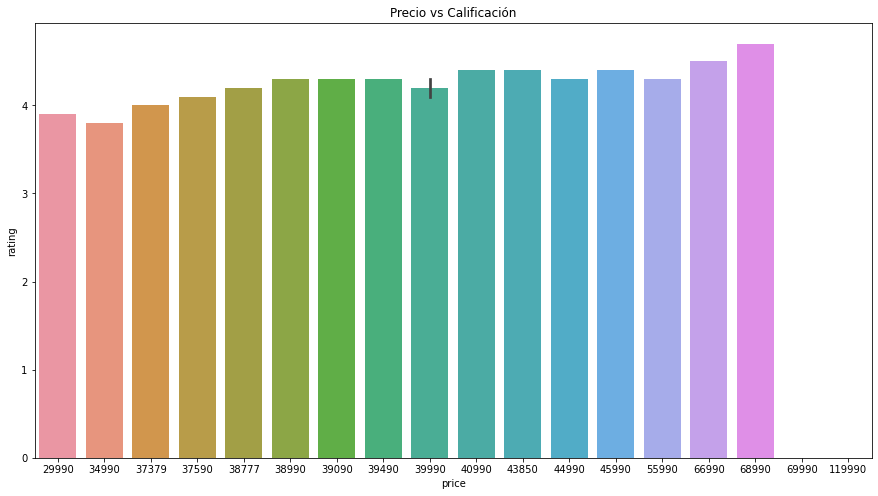

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(x='price', y='rating', data=laptop_df).set(title='Precio vs Calificación')

[Text(0.5, 1.0, 'Calificación vs Precio')]

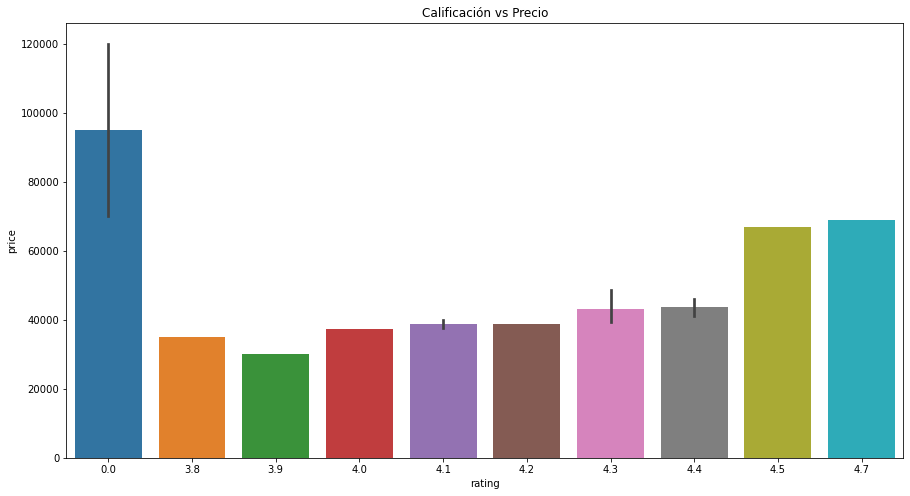

In [40]:
plt.figure(figsize=(15,8))
sns.barplot(x='rating', y='price', data=laptop_df).set(title='Calificación vs Precio')

Podemos concluir a partir de aquí que los productos con precios más altos tienen calificaciones más altas hasta cierto punto.

[Text(0.5, 1.0, 'Box plot')]

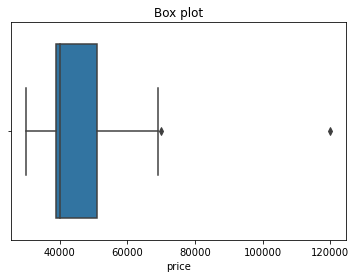

In [41]:
sns.boxplot(x='price', data=laptop_df).set(title='Box plot')

## ¿Les ha salido algún discordante visual a ustedes?

In [40]:
#completa

,rating,price,model,RAM,Storage,System,Other_Info
1,4.4,121500,Apple MacBook Pro Core i5 8th Gen,8 GB,512 GB SSD,Mac OS Mojave,MV9A2HN
15,4.7,62690,Dell Inspiron 3501 Core i5 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 10 Home/2 GB Graphics,Inspiro...
21,4.5,63990,Lenovo Legion Y540 Core i5 9th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 10 Home/4 GB Graphics/NVIDI...,NaN
23,4.3,61990,Dell Inspiron Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home,Ins 5408 Thin and Light Laptop


### ¿Para ustedes, cuáles fueron las computadoras más caras?

In [ ]:
#completa

----
----
----

<h1><center>Monte Carlo</center><h1>

### ¿Por qué la casa siempre gana?

¿Cómo ganan dinero los casinos? El truco es sencillo: "Cuanto más juegas, más ganan". Echemos un vistazo a cómo funciona esto con un ejemplo simple de simulación de Monte Carlo.

----

Considere un juego imaginario en el que un jugador tiene que elegir una ficha de una bolsa de fichas.

Reglas:
 * Hay fichas que contienen números que van del 1 al 100 en una bolsa.
 * Los usuarios pueden apostar en fichas pares o impares.
 * En este juego, el 10 y el 11 son números especiales. Si apostamos a pares, entonces 10 se contará como un número impar, y si apostamos a las probabilidades, entonces 11 se contará como un número par.
 * Si apostamos a números pares y obtenemos 10, perdemos.
 * Si apostamos a números impares y obtenemos 11, perdemos.

Si apostamos por las probabilidades, la probabilidad de que ganemos es de 49/100. 

---

La probabilidad de que la casa gane es de 51/100. 

---

### Importamos librerías

In [51]:
import random
import matplotlib.pyplot as plt

### Creación de las apuestas del jugador

In [ ]:
#Player bet
choice = input("Deseas apostar a pares o impares? \n")

#Pares
if choice == "Par":
    def pickNote():
        note = random.randint(1,100)
        #completa
            return False
        #completa
            return True

elif choice == "Odd":
    def pickNote():
        #completa

### Función principal

In [48]:
def play(total_money, bet_money, total_plays):
    num_plays=[]
    money=[]

    play = 1
    
    for play in range(total_plays):
        if pickNote():
            total_money = total_money + bet_money
            num_plays.#completa
            money.append#completa
            
        else:
            #completa
    
    plt.ylabel("Dinero en $")
    plt.xlabel("Numero de apuestas")
    plt.plot(#completa, #completa)
    
    final_funds.append(money[-1])
    return(final_funds)

### Resultado final

In [ ]:
final_funds = []
for i in range(10):
    ending_fund = play(10000, 100, 50)
    
print(ending_fund)
print(sum(ending_fund))

print("El jugador empezó con $10,000")
print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

## Ahora, para un total de apuestas de 5, 10 y 1000....

### Ahora para mil iteraciones

In [ ]:
 #completa

In [ ]:
 #completa

In [ ]:
 #completa

### ¿Qué conclusiones puedes inferir a partir del ejercicio anterior?

----

Tenga en cuenta que estos porcentajes son para nuestro juego figurativo y pueden modificarse....


-------

Al igual que con cualquier modelo de pronóstico, la simulación solo será tan buena como las estimaciones que hagamos. Es importante recordar que la simulación de Monte Carlo solo representa probabilidades y no certeza. Sin embargo, la simulación de Monte Carlo puede ser una herramienta valiosa a la hora de pronosticar un futuro desconocido.